In [8]:
from src.MeanShiftRunner import MeanShiftModelRunner
from src.PcaFeatureSet import PcaFeatureSet
from src.ManuallySelectedFeatureSet import ManuallySelectedFeatureSet
from src.uci_har_dataset import UciHarDataset
from sklearn.metrics import accuracy_score, classification_report
from src.FullFeatureSet import FullFeatureSet
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dataset = UciHarDataset()
pca_features = PcaFeatureSet(dataset, n_components=20)
manual_features = ManuallySelectedFeatureSet(dataset)
full_features = FullFeatureSet(dataset)

Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)
Selected features: train. Shape: (7352, 15)
Selected features: test. Shape: (2947, 15)
Scaled features using StandardScaler.


In [32]:

feature_sets = {
    'pca': pca_features,
    'manual_features': manual_features,
    'full_features': full_features
}
bandwidths = [2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]
for name, fs in feature_sets.items():
    print(f'Running grid search for {name}')
    runner = MeanShiftModelRunner(
        dataset=dataset,
        feature_set=fs,
    )
    for bandwidth in bandwidths:
        acc, silhouette, cluster_count = runner.run(bandwidth=bandwidth)
        
        print(f'Mean Shift [bandwidth{bandwidth}] - Silhouette Score: {silhouette}, Acc: {acc}, Cluster Count: {cluster_count}')

Running grid search for pca
Mean Shift [bandwidth2.0] - Silhouette Score: 0.08598097326885452, Acc: 0.7563624024431626, Cluster Count: 70
Mean Shift [bandwidth2.2] - Silhouette Score: 0.10052740781436371, Acc: 0.7417712928401764, Cluster Count: 47
Mean Shift [bandwidth2.4] - Silhouette Score: 0.12297471083633776, Acc: 0.7380386834068544, Cluster Count: 39
Mean Shift [bandwidth2.6] - Silhouette Score: 0.1538567601952615, Acc: 0.6783169324737021, Cluster Count: 22
Mean Shift [bandwidth2.8] - Silhouette Score: 0.18770882526876212, Acc: 0.6854428232100441, Cluster Count: 13
Mean Shift [bandwidth3.0] - Silhouette Score: 0.20709483919221405, Acc: 0.5537835086528673, Cluster Count: 13
Mean Shift [bandwidth3.2] - Silhouette Score: 0.23026986934239987, Acc: 0.5585341024770953, Cluster Count: 10
Mean Shift [bandwidth3.4] - Silhouette Score: 0.27588755819472827, Acc: 0.5646420088225313, Cluster Count: 8
Mean Shift [bandwidth3.6] - Silhouette Score: 0.2791890718666888, Acc: 0.35527655242619616, Cl


Accuracy on MeanShift (test): 0.5646

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.38      0.93      0.54       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.74      0.33      0.45       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.52      0.99      0.68       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.56      2947
         macro avg       0.44      0.54      0.45      2947
      weighted avg       0.45      0.56      0.46      2947



/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divi

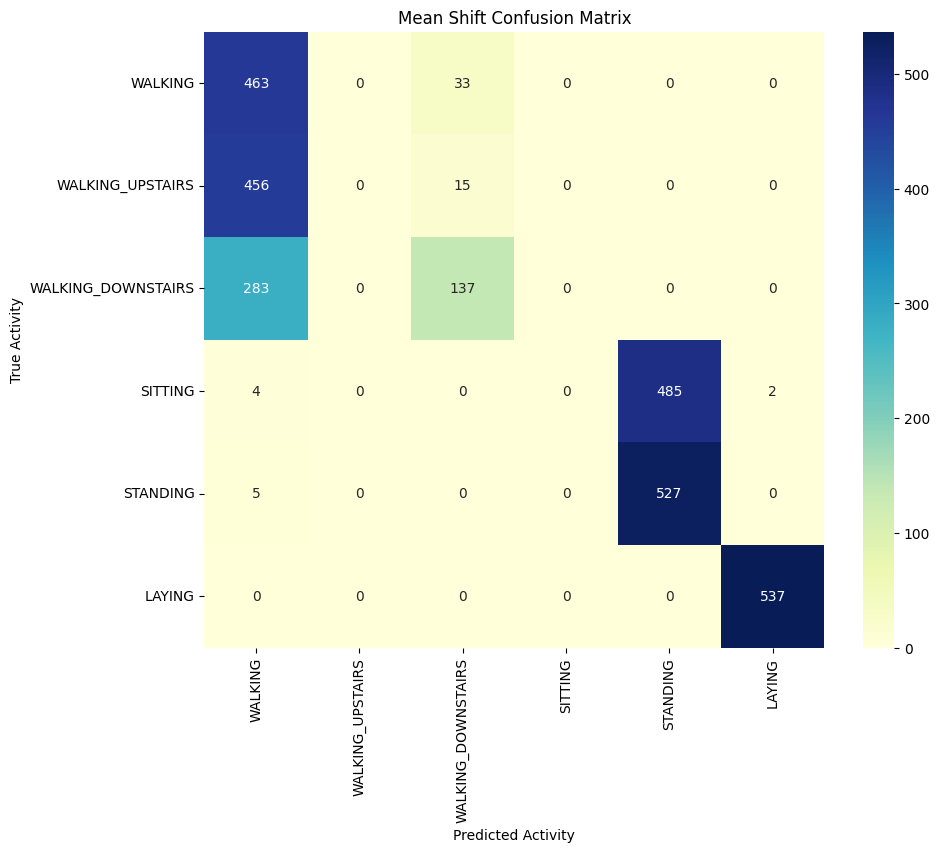

(0.5646420088225313, 0.27588755819472827)

In [36]:
runner = MeanShiftModelRunner(
    dataset=dataset,
    feature_set=pca_features,
)
runner.run(bandwidth=3.4)
runner.evaluate(verbose=True, filename="fig/msc_pca_cm.svg")


Accuracy on MeanShift (test): 0.5222

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.36      0.99      0.52       496
  WALKING_UPSTAIRS       0.00      0.00      0.00       471
WALKING_DOWNSTAIRS       0.59      0.02      0.05       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.51      1.00      0.68       532
            LAYING       0.98      0.95      0.97       537

          accuracy                           0.52      2947
         macro avg       0.41      0.49      0.37      2947
      weighted avg       0.42      0.52      0.39      2947



/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dveduard/projects/unsupervised-activity-clustering/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divi

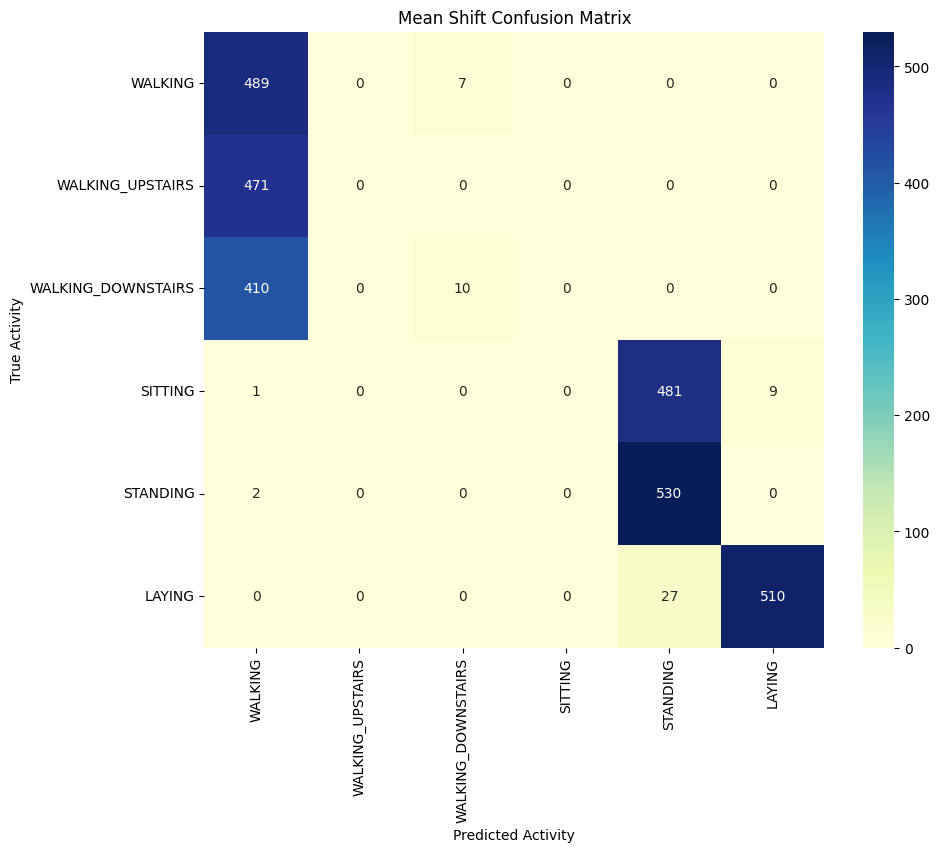

(0.5222259925347811, 0.3737019209848387)

In [35]:
runner = MeanShiftModelRunner(
    dataset=dataset,
    feature_set=manual_features,
)
runner.run(bandwidth=2.6)
runner.evaluate(verbose=True, filename="fig/msc_manual_cm.svg")